In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/drive/MyDrive/binary_classification_train.csv')
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-36.963099,-15.014703,87.100435,101.523360,82.106571,-10.956180,0.592326,-51.919028,-90.650434,...,-81.183744,13.101921,18.051450,-40.606288,-39.697053,-13.870802,173.722987,-17.349169,-82.550844,0
1,2,-43.715674,18.847116,89.543406,-71.319314,35.597052,126.358570,-29.837495,-40.473764,-94.079238,...,-37.848260,7.457352,-77.420742,53.773718,-100.124294,9.870650,11.592519,-106.123605,-92.796421,1
2,3,-30.737550,-63.729643,106.081332,81.773948,112.769976,-12.425351,-29.913286,-41.771200,16.424511,...,-106.610289,5.930143,-30.177083,-138.969234,-56.054914,-12.790661,164.832498,-37.412902,-85.441150,0
3,4,-27.674757,-118.869495,135.605213,99.130189,50.947548,-63.704785,-7.353057,-58.140229,-80.209027,...,-149.056417,3.893419,-74.100869,-47.659832,-48.209817,-36.264323,59.001922,-59.064134,-78.538639,0
4,5,-28.654141,-77.746597,85.215365,50.374774,79.763207,-32.703048,-28.152031,-63.994794,-153.566789,...,-102.731465,11.160205,-13.395073,9.416237,2.649524,-43.578704,52.261888,-66.081738,-80.325110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,47996,-36.628645,-165.120975,107.217867,122.925449,62.981807,19.830836,-3.643254,-45.443651,-149.839003,...,-10.218916,12.704617,25.496814,-102.901598,-45.433223,15.287095,194.369851,-45.661009,-78.589630,0
47996,47997,-39.109204,-9.889646,-6.131819,-52.788080,80.955847,-1.706958,-3.413089,-29.704302,-36.493671,...,-116.006445,0.868396,-146.734100,270.764036,6.377969,-97.921769,131.505353,-6.202176,-94.503454,1
47997,47998,-35.345541,-80.690360,94.402843,9.939977,70.557427,-24.686198,-10.011303,-30.297466,-117.836860,...,-12.575333,13.949337,-39.750319,0.710971,-44.584569,-33.617283,135.929230,-48.408353,-75.406154,0
47998,47999,-39.594067,-63.804277,52.270657,-140.771476,91.726459,48.515770,6.772685,-31.187427,-199.382895,...,3.318065,13.166798,-193.058900,354.841782,-11.650224,-81.109922,208.534353,-38.514382,-85.694189,0


In [3]:
data_arr=np.array(data)
X=data_arr[:,1:-1]
Y=data_arr[:,-1]
X.shape,Y.shape

((48000, 20), (48000,))

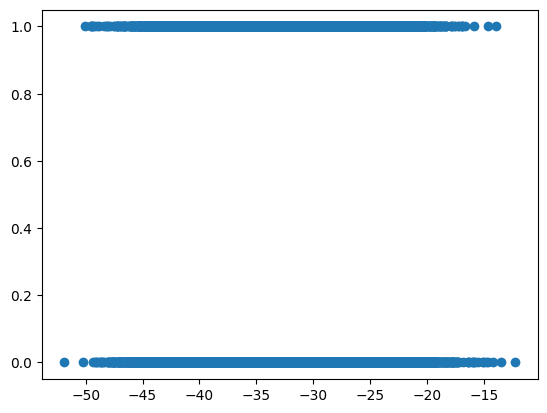

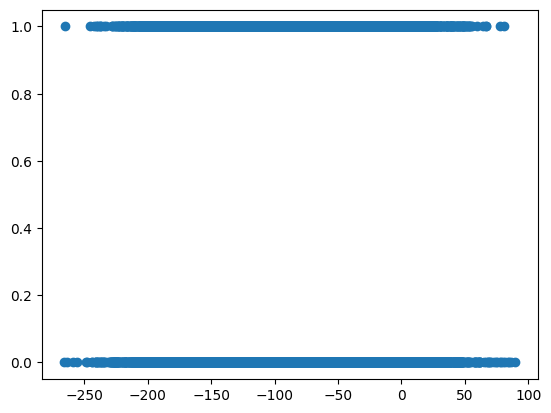

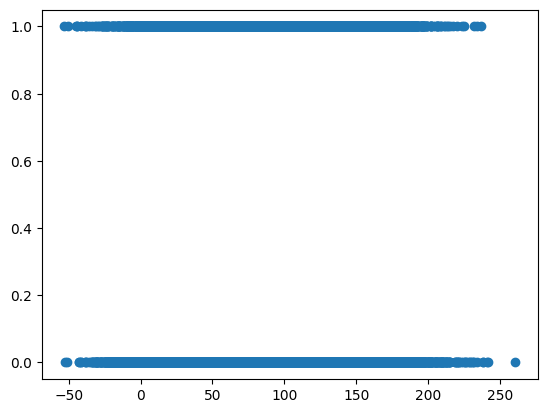

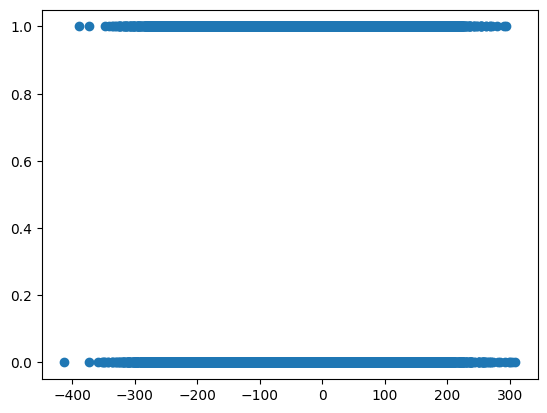

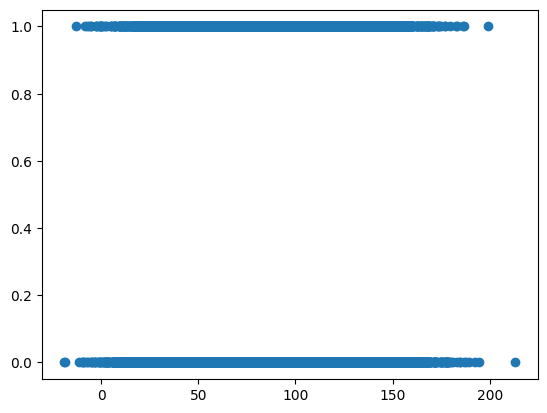

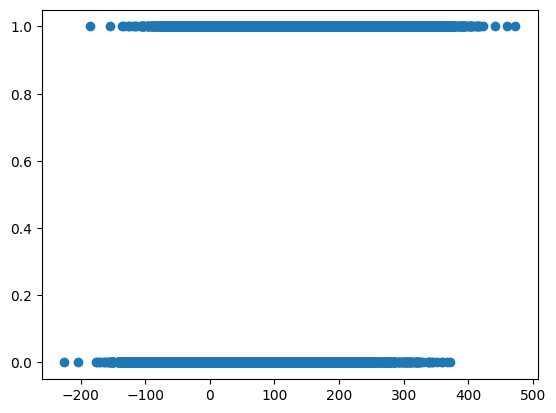

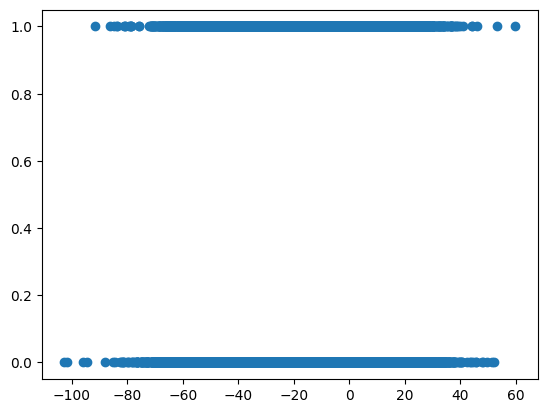

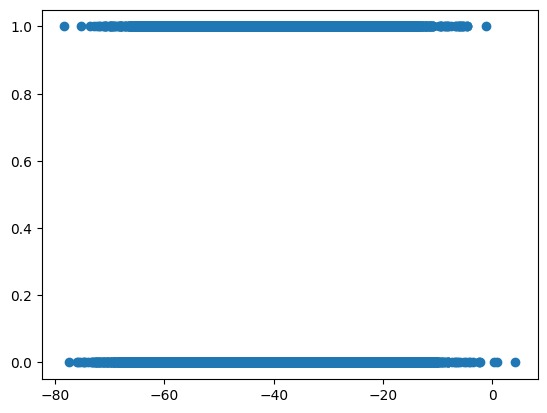

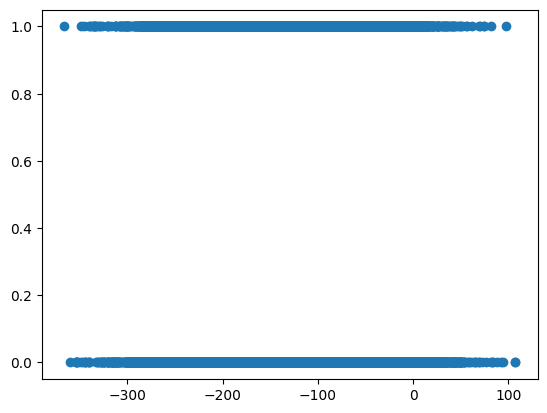

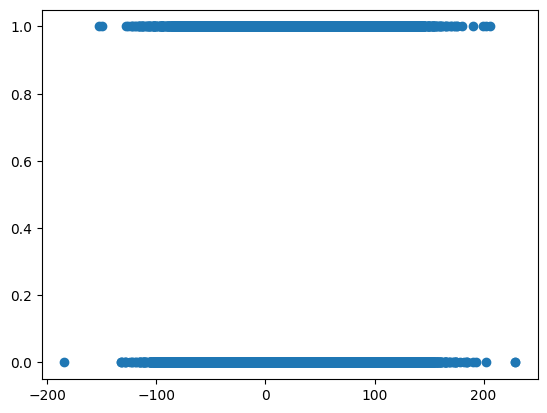

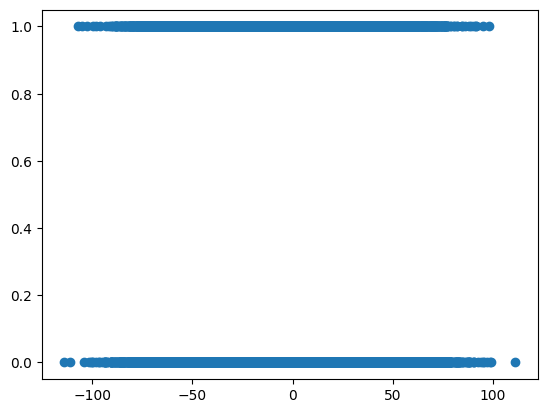

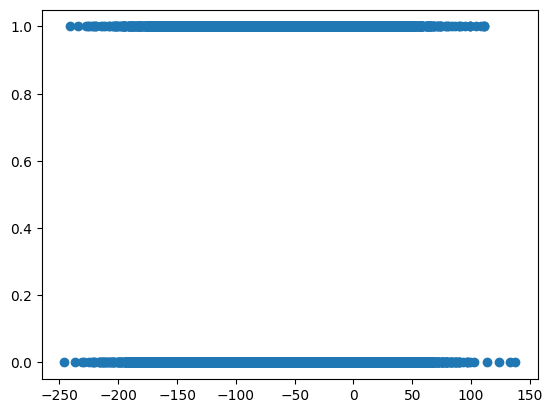

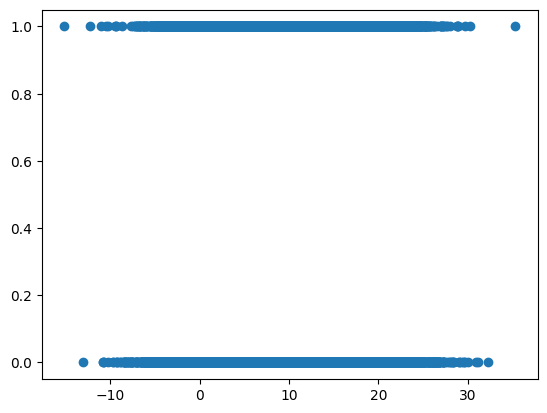

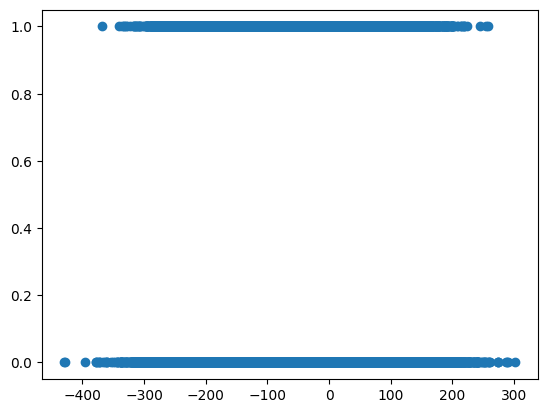

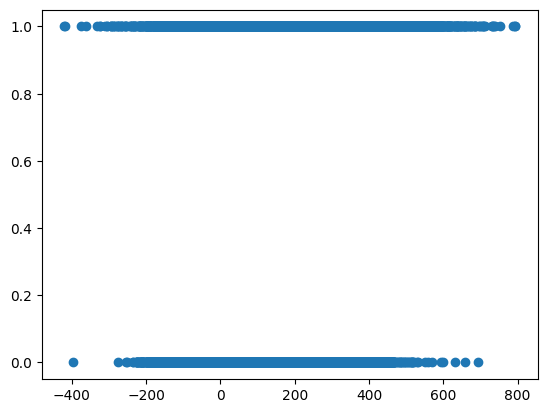

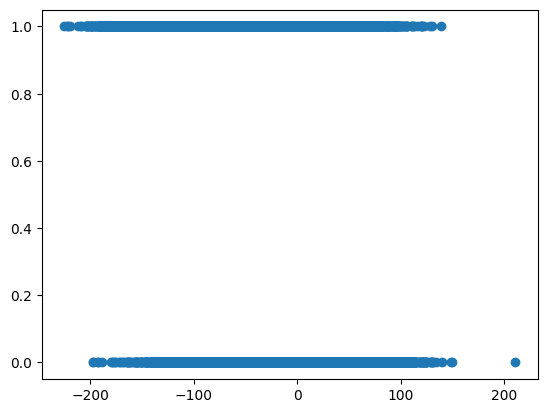

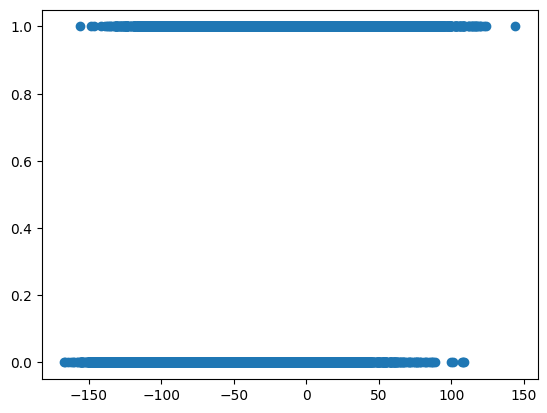

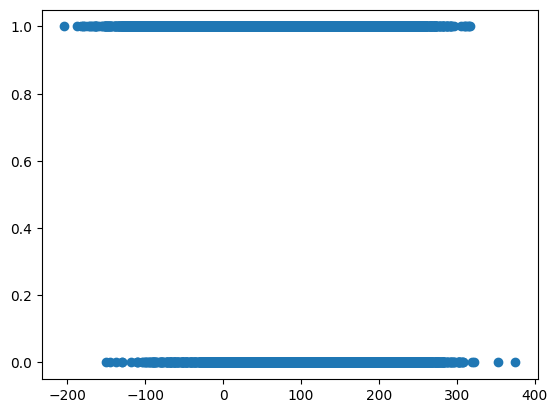

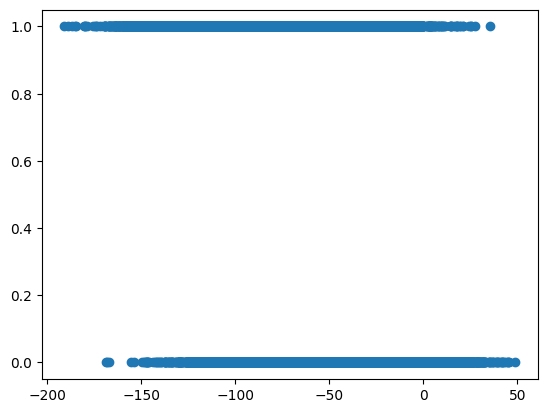

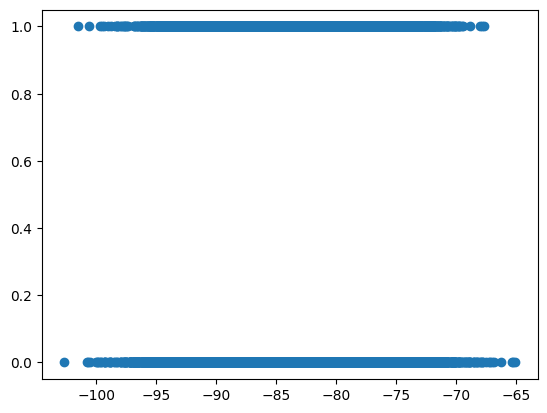

In [4]:
for i in range(X.shape[1]):
   plt.scatter(X[:,i],Y)
   plt.show()

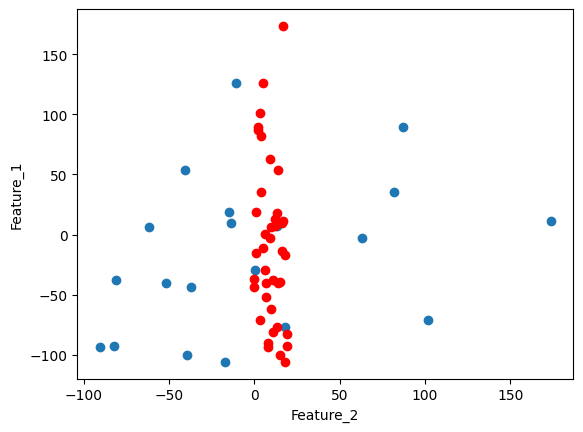

In [5]:
plt.ylabel('Feature_1')
plt.xlabel('Feature_2')
plt.plot(X[0],'or')
plt.plot(X[1],'or')
plt.scatter(X[0],X[1])
plt.show()

In [6]:
def sigmoid(z):

    g = (1+np.exp(-z))
    g = 1/g

    return g

In [7]:
def gradient_descent(X, y, w_init, b_init, learning_rate , iteration,lambda_):


    cost_list = []

    for i in range(iteration):

        z = np.dot(X, w_init) + b_init
        f_wb = sigmoid(z)
        cost = -(1 / m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))+(lambda_/(2*m))*np.sum(w_init**2)
        cost_list.append(cost)

        d_w = (1 / m) * np.dot(X.T, (f_wb - y)) + (1/m)*lambda_*w_init
        d_b = (1 / m) * np.sum((f_wb - y))


        w_init = w_init - learning_rate * d_w
        b_init = b_init - learning_rate * d_b


        if(i%(iteration/10)==0):
            print("Cost is :", cost)


    return w_init, b_init, cost_list

In [8]:
mu     = np.mean(X,axis=0)
sigma  = np.std(X,axis=0)
X_mean = (X - mu)
X_norm = (X - mu)/sigma

In [9]:
m,n = X.shape
initial_w = np.random.rand(n)
initial_b = 0

In [10]:
iterations = 1000
alpha = 1
lambda_0 = 0.1
w_init,b_init,cost_list = gradient_descent(X_norm,Y,initial_w,initial_b,learning_rate=alpha,iteration = iterations, lambda_ = lambda_0)

Cost is : 0.9988041692771776
Cost is : 0.24679021733994327
Cost is : 0.24667428058541613
Cost is : 0.24667293752921926
Cost is : 0.24667292143220731
Cost is : 0.24667292117588366
Cost is : 0.24667292110924147
Cost is : 0.24667292104489755
Cost is : 0.24667292098060764
Cost is : 0.24667292091634482


In [11]:
w_init

array([ 0.01072587, -0.02270885,  0.01305098, -0.82947519,  0.00444582,
        1.53581352,  0.02927321,  0.01838042,  0.29174807,  0.03106185,
       -0.04399915, -0.0182292 , -0.02090762,  0.25017693,  0.64211851,
       -0.47223045,  1.13597446, -0.58662385, -0.04974743, -0.01814627])

In [12]:
z = np.dot(X_norm,w_init)+b_init
f_wb=sigmoid(z)
f_wb

array([0.02035697, 0.89857414, 0.02952417, ..., 0.02580844, 0.07233625,
       0.79818405])

In [13]:
p =[]
z = np.dot(X_norm,w_init)+b_init
f_wb=sigmoid(z)
for i in f_wb:
  if i>=0.5:
    p.append(1)

  else:
    p.append(0)

print(p)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 

In [14]:
p = np.array(p)
p

array([0, 1, 0, ..., 0, 0, 1])

In [15]:
print('Train Accuracy:', {np.mean(p == Y) * 100})

Train Accuracy: {93.48125}


In [16]:
def confusion_matrix(y_true, y_pred):
    # Initialize confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    return TP, FP, FN, TN

def f1_score_using_confusion_matrix(y_true, y_pred):
    # Get confusion matrix values
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred)

    # Calculate precision and recall
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0

    # Calculate F1 score
    if precision + recall == 0:
        return 0
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1


In [17]:
f1 = f1_score_using_confusion_matrix(Y, p)
print(f"F1 Score: {f1}")

F1 Score: 0.893748514380794


In [18]:
def plot_confusion_matrix(y_true, y_pred):
    # Get confusion matrix values
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred)

    # Create confusion matrix as a 2x2 DataFrame
    cm = pd.DataFrame([[TN, FP], [FN, TP]],
                      index=['Actual Negative', 'Actual Positive'],
                      columns=['Predicted Negative', 'Predicted Positive'])

    # Plotting using Matplotlib
    fig, ax = plt.subplots(figsize=(6, 4))
    cax = ax.matshow(cm, cmap='Blues')  # Display the confusion matrix as an image
    fig.colorbar(cax)  # Add color bar

    # Annotate each cell with the numeric value
    for (i, j), val in np.ndenumerate(cm.values):
        ax.text(j, i, val, ha='center', va='center', color='black')

    # Set axis labels
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')

    # Set tick labels (for clarity)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicted Negative', 'Predicted Positive'])
    ax.set_yticklabels(['Actual Negative', 'Actual Positive'])

    # Show the plot
    plt.show()

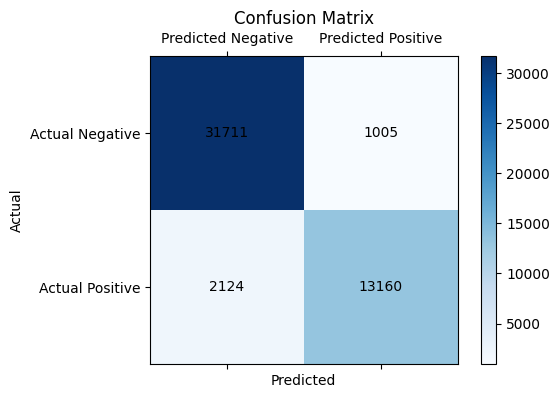

In [19]:
plot_confusion_matrix(Y, p)

In [20]:
test = pd.read_csv('/content/drive/MyDrive/binary_classification_test.csv')
test

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20
0,1,-21.263636,-101.510764,70.115563,-67.257828,60.603386,-14.047965,-20.077225,-39.171738,-109.037261,...,7.362312,-55.689290,11.794318,-192.876941,174.389915,-56.913898,-66.920817,136.880728,-53.746527,-88.624312
1,2,-28.646489,-104.090028,124.098974,-45.906780,85.691869,91.241763,-2.532164,-43.701116,-151.491278,...,-45.258211,-55.069378,11.297918,-212.560404,330.864084,-39.186926,-52.041948,155.040051,-43.390476,-85.584791
2,3,-34.084427,-149.471464,131.883193,96.372918,41.865528,-14.692982,25.448955,-56.218421,-179.342647,...,-29.196270,-34.475233,0.030514,-41.534695,-36.002752,-90.759938,5.575351,201.929910,-40.225772,-86.235677
3,4,-38.905587,-126.038930,86.480118,-76.173919,98.722116,15.411935,-35.391915,-23.142612,-109.017318,...,-49.361568,-103.689725,12.311099,-188.698902,229.626393,-35.442610,-72.384866,100.019033,-56.657687,-83.543328
4,5,-41.041415,-124.302646,89.549410,-98.980090,72.425692,15.907022,5.400643,-32.267154,-181.961829,...,-3.392246,-27.353560,13.073419,-138.289303,151.146083,-60.065501,-45.043483,196.572356,-58.595875,-81.748002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,-24.270292,-40.953059,126.403165,-85.023186,73.873895,19.786924,-22.982705,-50.008823,-156.884564,...,25.978997,-113.367380,10.986390,-140.942676,182.139617,-43.847476,-54.396578,168.108976,-52.430031,-82.596009
11996,11997,-30.474886,-201.124891,79.824920,-96.541722,77.483155,186.285533,-25.046521,-29.834080,-119.905884,...,-15.314635,-64.909589,14.436577,59.749052,138.863511,29.666147,-13.209735,23.457680,-81.892426,-91.273899
11997,11998,-24.547995,-152.072592,132.767918,-27.689569,141.583374,68.408449,-8.904655,-47.991714,-213.988828,...,-66.195623,-7.965866,16.889205,39.397099,-23.141800,-36.332002,7.761841,148.106184,-80.194494,-89.791122
11998,11999,-29.200068,-100.303304,115.709923,-91.765981,108.346710,213.651331,-42.345070,-29.450930,-159.795863,...,-30.179518,7.833912,6.801287,28.557516,231.858233,-2.655919,-0.618842,180.817907,-36.343703,-85.994005


In [21]:
test_arr = np.array(test)
X_test = test_arr[:,1:]
X_test

array([[ -21.26363576, -101.51076439,   70.11556349, ...,  136.88072759,
         -53.74652746,  -88.62431164],
       [ -28.64648942, -104.09002777,  124.09897384, ...,  155.04005059,
         -43.39047591,  -85.58479057],
       [ -34.08442676, -149.47146391,  131.88319263, ...,  201.92991029,
         -40.22577214,  -86.23567733],
       ...,
       [ -24.54799465, -152.07259248,  132.76791814, ...,  148.10618381,
         -80.19449353,  -89.79112231],
       [ -29.20006765, -100.30330433,  115.70992256, ...,  180.81790728,
         -36.34370299,  -85.99400505],
       [ -25.23942763, -188.99675094,   87.77596258, ...,  175.62274141,
         -19.16044345,  -81.53031155]])

In [22]:
w_init

array([ 0.01072587, -0.02270885,  0.01305098, -0.82947519,  0.00444582,
        1.53581352,  0.02927321,  0.01838042,  0.29174807,  0.03106185,
       -0.04399915, -0.0182292 , -0.02090762,  0.25017693,  0.64211851,
       -0.47223045,  1.13597446, -0.58662385, -0.04974743, -0.01814627])

In [23]:
b_init

-1.3546629220604265

In [24]:
mu_test     = np.mean(X_test,axis=0)
sigma_test  = np.std(X_test,axis=0)
X_mean_test = (X_test - mu_test)
X_norm_test = (X_test - mu_test)/sigma_test
X_norm_test

array([[ 2.42897685e+00, -3.02879227e-01, -5.62626580e-01, ...,
         3.40294279e-01,  2.03227402e-03, -1.06886488e+00],
       [ 8.60118430e-01, -3.59830261e-01,  8.22035338e-01, ...,
         5.95997191e-01,  3.45664799e-01, -3.95258403e-01],
       [-2.95444741e-01, -1.36186819e+00,  1.02169874e+00, ...,
         1.25625714e+00,  4.50675395e-01, -5.39505318e-01],
       ...,
       [ 1.73104969e+00, -1.41930201e+00,  1.04439174e+00, ...,
         4.98360846e-01, -8.75559084e-01, -1.32744878e+00],
       [ 7.42482905e-01, -2.76218088e-01,  6.06858124e-01, ...,
         9.58977298e-01,  5.79489472e-01, -4.85946876e-01],
       [ 1.58411999e+00, -2.23460030e+00, -1.09641451e-01, ...,
         8.85823743e-01,  1.14966111e+00,  5.03278989e-01]])

In [26]:

p =[]
z = np.dot(X_norm_test,w_init)+b_init
f_wb=sigmoid(z)
for i in f_wb:
  if i>=0.5:
    p.append(1)

  else:
    p.append(0)

print(p)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 